In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 4.1 EDA a data preprocessing

## 4.1 A

### Information

In [113]:
df = pd.read_csv("NFLX.csv", sep=',', engine="python")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4581 non-null   object 
 1   Open       4581 non-null   float64
 2   High       4581 non-null   float64
 3   Low        4581 non-null   float64
 4   Close      4581 non-null   float64
 5   Adj Close  4581 non-null   float64
 6   Volume     4581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 250.7+ KB


In [115]:
df['Date'] = pd.to_datetime(df['Date'])

In [116]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4581,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03
mean,2011-06-27 20:17:07.897838592,78.031471,79.285690,76.736079,78.072056,78.072056,1.760516e+07
min,2002-05-23 00:00:00,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,2006-12-07 00:00:00,3.778571,3.857143,3.685714,3.784286,3.784286,6.908900e+06
50%,2011-06-27 00:00:00,15.392858,15.671429,14.970000,15.324286,15.324286,1.155350e+07
75%,2016-01-14 00:00:00,97.830002,99.529999,96.760002,97.889999,97.889999,2.113440e+07
max,2020-08-03 00:00:00,567.979980,575.369995,520.960022,548.729980,548.729980,3.234140e+08
std,NaN,118.372084,120.276839,116.376768,118.435303,118.435303,1.971130e+07


In [117]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [118]:
df.isnull().sum().sum()

np.int64(0)

In [119]:
df.duplicated().sum()

np.int64(0)

### NFLX price dynamics

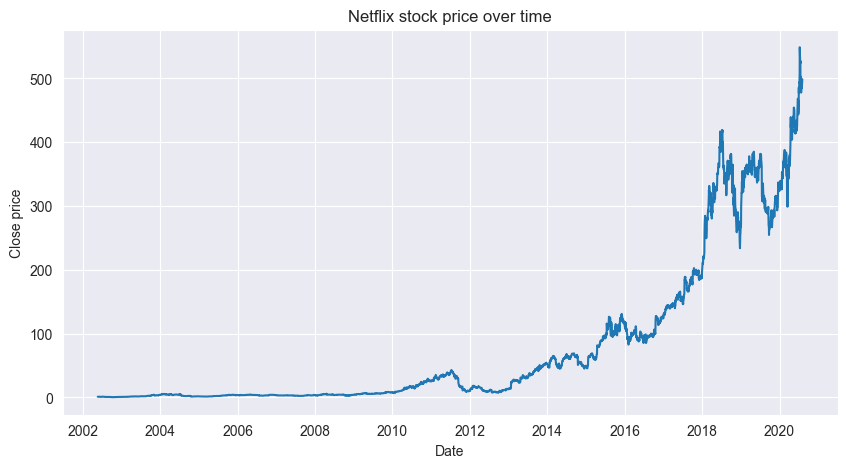

In [120]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Netflix stock price over time')
plt.show()

The closing price chart shows that Netflix shares demonstrated significant growth during the reporting period. Between 2002 and 2010, the price remained low, generally below $10. The first significant increase occurred around 2012.

The most significant growth occurred between 2016 and 2020, when the price exceeded $500. There are also several sharp fluctuations, indicating the high sensitivity of the shares to market events and investor decisions.

Overall, the graph confirms that this is a time series with a strong upward trend that is not linear and contains several periods of sharp changes. Therefore, it is advisable to also use nonlinear methods in modeling.

### Volume dynamics

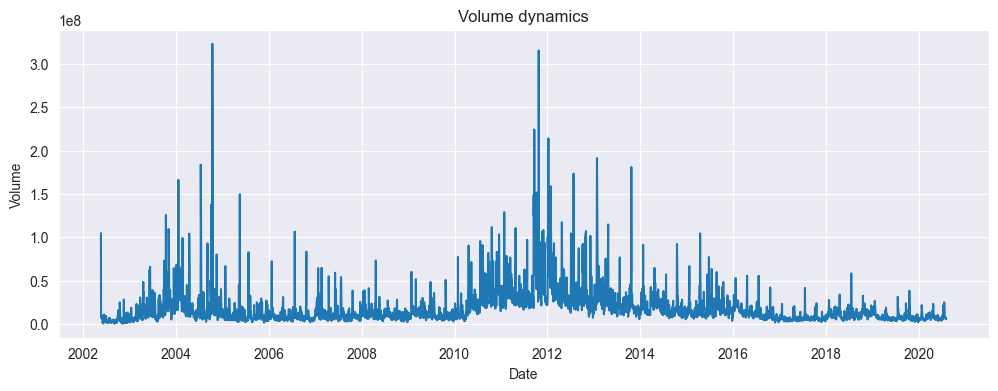

In [121]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volume'])
plt.title("Volume dynamics")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

The trading volume chart shows that there are significant differences between individual periods. On some days, trading volume exceeds 300 million, while on other days it is relatively low.

The most notable peaks in volume are observed in 2004–2005 and 2011–2012, which is usually associated with important company announcements, quarterly results, or the overall market situation.

Trading volume is volatile and does not show a clear long-term trend, but sudden increases often affect the stock price. Therefore, volume can be a useful additional variable for modeling future prices.

### Correlations

In [122]:
corr = df.drop(columns=['Date']).corr()

In [123]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999841,0.999830,0.999654,0.999654,-0.193770
High,0.999841,1.000000,0.999783,0.999840,0.999840,-0.192107
Low,0.999830,0.999783,1.000000,0.999834,0.999834,-0.195478
Close,0.999654,0.999840,0.999834,1.000000,1.000000,-0.193671
Adj Close,0.999654,0.999840,0.999834,1.000000,1.000000,-0.193671
Volume,-0.193770,-0.192107,-0.195478,-0.193671,-0.193671,1.000000


### Data preprocessing

In [124]:
y = df['Close'].values
X = df.drop(columns=['Close', 'Adj Close', 'Date'], axis=1).values
feature_names = df.drop(columns=['Close'], axis=1).columns

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 4.1 B

Regression machine learning methods were chosen to solve the problem, since the target variable is the numerical value of the closing price of a stock (Close). Linear regression was used as the base model because it is simple, fast, and easy to interpret. It serves as a benchmark model for comparison with more advanced methods.

Next, the Random Forest Regressor model was used, which is capable of capturing even nonlinear relationships between input characteristics. This model is suitable for financial data, where the relationships between variables do not necessarily have to be strictly linear.


## 4.2. Modeling and evaluation


## 4.2 A

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

def print_metrics(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("MAE: ", mean_absolute_error(y_true, y_pred))
    print("MSE: ", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:  ", r2_score(y_true, y_pred))
    print()

In [128]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

y_pred_lr_train = lr.predict(scaled_X_train)
y_pred_lr_test = lr.predict(scaled_X_test)

print_metrics("LinearRegression (Train)",  y_train, y_pred_lr_train)
print_metrics("LinearRegression (Test)",  y_test, y_pred_lr_test)

=== LinearRegression (Train) ===
MAE:  0.5707168294427927
MSE:  2.1248496010996116
RMSE: 1.4576863864012766
R2:   0.9998479704034459

=== LinearRegression (Test) ===
MAE:  0.5187513366215913
MSE:  1.6575072969444251
RMSE: 1.2874421528536437
R2:   0.999883376401099



In [129]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

print_metrics("RandomForestRegressor (Train)",  y_train, y_pred_rf_train)
print_metrics("RandomForestRegressor (Test)",  y_test, y_pred_rf_test)

=== RandomForestRegressor (Train) ===
MAE:  0.28382889539664996
MSE:  0.531842168049425
RMSE: 0.7292750976479486
R2:   0.9999619475419826

=== RandomForestRegressor (Test) ===
MAE:  0.6670271362195643
MSE:  2.640440735027825
RMSE: 1.6249433020963608
R2:   0.9998142163827747



In [130]:
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

r2_lr_test = r2_score(y_test, y_pred_lr_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE (Test)': [rmse_lr_test, rmse_rf_test],
    'R2 (Test)': [r2_lr_test, r2_rf_test]
})

results

,Model,RMSE (Test),R2 (Test)
0,Linear Regression,1.287442,0.999883
1,Random Forest,1.624943,0.999814


The table shows that linear regression has a smaller error and a higher $R^2$ value on the test data. Therefore, it was chosen as the best model.

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr_test, alpha=0.5)
plt.xlabel('Real Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression: Real vs Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()

The graph shows a comparison of actual and predicted prices. Since most points lie close to the diagonal line, we can say that the model predicts the price very accurately. The difference between actual and predicted values is small.

## 4.2 B

The approach used included basic data exploration, selection of relevant characteristics, and their preliminary processing. The data was divided into training and test samples, which allowed for an objective evaluation of the models on unseen data. The effectiveness of the models was assessed using the RMSE metric and the R² coefficient of determination.

Based on the results, linear regression analysis was selected as the best model, achieving a lower RMSE error and a higher R² value on the test data compared to the Random Forest model. The results show that the chosen approach was appropriate and that the model can predict the closing price of a stock with sufficient accuracy.

